### I have a sample dataset where we have total amount of transaction from 2017 to 2024. Now I will try to build some model to forecast future transaction amount. I will use ARIMA, LSTM and PROPHET model to forecast will see which one is doing better job.<br>In this part, I will use PROPHET model.<br>This is part 3.

# Importing Library and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/transaction data2.csv')
df.head()

,datetime,trans_count,trans_amount
0,2017-01-01 09:56:10,1,848.0
1,2017-01-01 10:08:41,1,500.0
2,2017-01-01 10:10:37,1,471.0
3,2017-01-01 10:21:16,1,110.0
4,2017-01-01 10:26:19,1,0.0


In [ ]:
df1=df[['datetime','trans_amount']]
df1

,datetime,trans_amount
0,2017-01-01 09:56:10,848.0
1,2017-01-01 10:08:41,500.0
2,2017-01-01 10:10:37,471.0
3,2017-01-01 10:21:16,110.0
4,2017-01-01 10:26:19,0.0
...,...,...
11976841,2024-03-31 19:43:23,10.0
11976842,2024-03-31 19:44:09,502.0
11976843,2024-03-31 19:44:20,10.0
11976844,2024-03-31 19:45:04,10.0


# Renaming column for Prophet model

In [ ]:
df1.rename(columns={'datetime': 'ds','trans_amount': 'y'}, inplace=True)

In [ ]:
df1

,ds,y
0,2017-01-01 09:56:10,848.0
1,2017-01-01 10:08:41,500.0
2,2017-01-01 10:10:37,471.0
3,2017-01-01 10:21:16,110.0
4,2017-01-01 10:26:19,0.0
...,...,...
11976841,2024-03-31 19:43:23,10.0
11976842,2024-03-31 19:44:09,502.0
11976843,2024-03-31 19:44:20,10.0
11976844,2024-03-31 19:45:04,10.0


In [ ]:
df1['ds'] = pd.to_datetime(df1['ds'])
df1.head()

,ds,y
0,2017-01-01 09:56:10,848.0
1,2017-01-01 10:08:41,500.0
2,2017-01-01 10:10:37,471.0
3,2017-01-01 10:21:16,110.0
4,2017-01-01 10:26:19,0.0


In [ ]:
df1.set_index('ds', inplace=True)

In [ ]:
ts=df1['y'].resample('MS').sum()
ts

ds
2017-01-01    4.977332e+07
2017-02-01    4.262793e+07
2017-03-01    5.308049e+07
2017-04-01    4.969003e+07
2017-05-01    4.180399e+07
                  ...     
2023-11-01    1.045445e+10
2023-12-01    9.791298e+09
2024-01-01    1.124518e+10
2024-02-01    1.044804e+10
2024-03-01    9.739796e+09
Freq: MS, Name: y, Length: 87, dtype: float64

In [ ]:
df3=pd.DataFrame(ts)
df3.head()

,y
ds,
2017-01-01,49773319.66
2017-02-01,42627926.21
2017-03-01,53080485.63
2017-04-01,49690031.66
2017-05-01,41803989.44


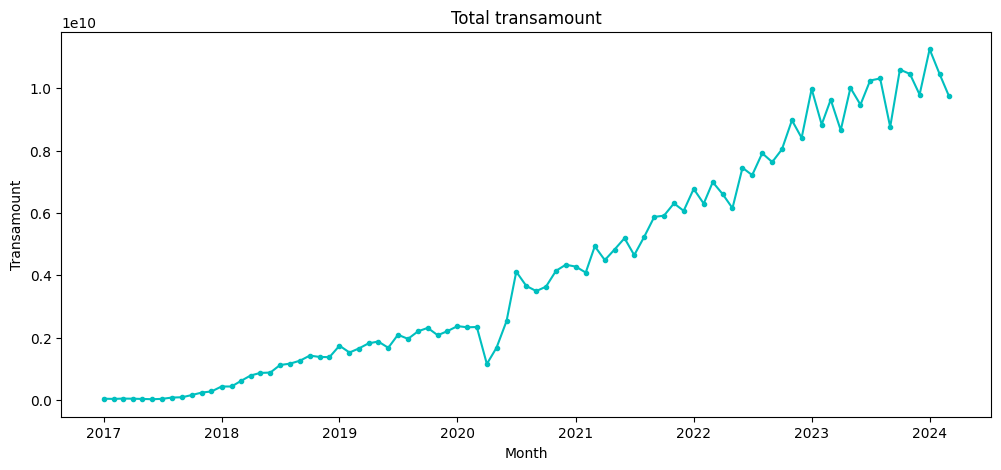

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel("Month")
plt.ylabel("Transamount")
plt.title('Total transamount')
plt.plot(df3.index, df3.y, color = 'c', marker='.')

# train-test split

In [ ]:
train = df3[:round(len(df3)*80/100)]
len(train)

70

In [ ]:
train.head()

,y
ds,
2017-01-01,49773319.66
2017-02-01,42627926.21
2017-03-01,53080485.63
2017-04-01,49690031.66
2017-05-01,41803989.44


In [ ]:
test = df3[round(len(df3)*80/100):]
len(test)

17

In [ ]:
test.head()

,y
ds,
2022-11-01,8.969331e+09
2022-12-01,8.405503e+09
2023-01-01,9.973865e+09
2023-02-01,8.832465e+09
2023-03-01,9.628450e+09


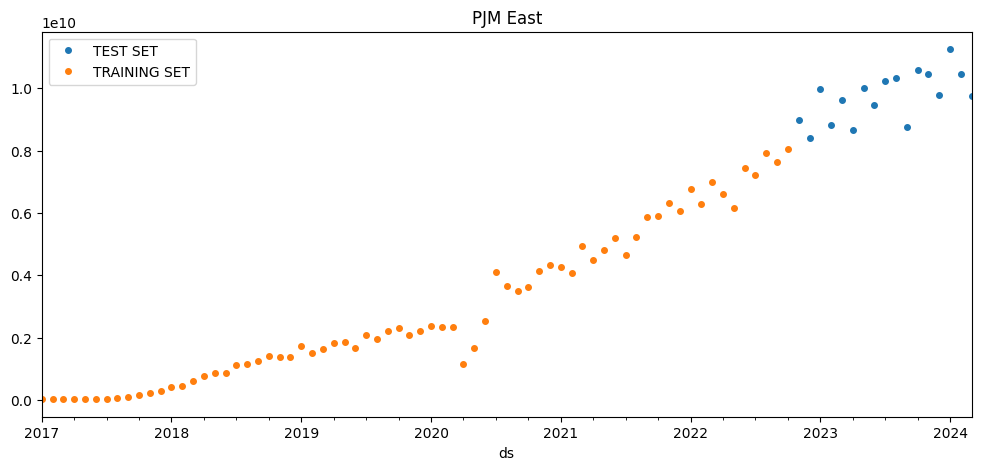

In [ ]:
test.rename(columns={'y': 'TEST SET'})\
    .join(train.rename(columns={'y': 'TRAINING SET'}),how='outer')\
    .plot(figsize=(12, 5), title='PJM East', style='.', ms=8)
plt.show()

In [ ]:
train.reset_index(inplace=True)

In [ ]:
train.tail()

,ds,y
65,2022-06-01,7.448149e+09
66,2022-07-01,7.211902e+09
67,2022-08-01,7.913525e+09
68,2022-09-01,7.630886e+09
69,2022-10-01,8.037575e+09


In [ ]:
test.reset_index(inplace=True)

In [ ]:
test.head()

,ds,y
0,2022-11-01,8.969331e+09
1,2022-12-01,8.405503e+09
2,2023-01-01,9.973865e+09
3,2023-02-01,8.832465e+09
4,2023-03-01,9.628450e+09


In [ ]:
# !pip install prophet

In [ ]:
from prophet import Prophet

This is the parameter of Prophet model:
```
model = Prophet(growth='linear',                 # Trend growth mode: 'linear'
                changepoint_prior_scale=0.5,    # Flexibility of trend
                n_changepoints=25,              # Number of potential changepoints
                seasonality_mode='additive',    # Seasonality mode: 'additive'
                seasonality_prior_scale=10.0,   # Strength of seasonal components
                holidays=None,                  # Specify holidays (if any)
                holidays_prior_scale=10.0,      # Impact of holidays
                interval_width=0.8,             # Width of uncertainty intervals
                mcmc_samples=0)

```



In [ ]:
m = Prophet(changepoint_prior_scale=0.2,    # Flexibility of trend
                n_changepoints=100,              # Number of potential changepoints
                seasonality_mode='additive')
model= m.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/dsb8_kmx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/z4g3792i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63256', 'data', 'file=/tmp/tmp6dmlkj6f/dsb8_kmx.json', 'init=/tmp/tmp6dmlkj6f/z4g3792i.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelj5831eci/prophet_model-20240422121110.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:11:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [ ]:
test_predict = model.predict(test)

In [ ]:
test_predict.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,8.122305e+09,7.835802e+09,8.535728e+09,8.120511e+09,8.124370e+09,6.632234e+07,6.632234e+07,6.632234e+07,6.632234e+07,6.632234e+07,6.632234e+07,0.0,0.0,0.0,8.188627e+09
1,2022-12-01,8.298434e+09,7.962755e+09,8.626471e+09,8.292462e+09,8.304813e+09,-2.429157e+07,-2.429157e+07,-2.429157e+07,-2.429157e+07,-2.429157e+07,-2.429157e+07,0.0,0.0,0.0,8.274142e+09
2,2023-01-01,8.480434e+09,8.274169e+09,8.963419e+09,8.468052e+09,8.493210e+09,1.332213e+08,1.332213e+08,1.332213e+08,1.332213e+08,1.332213e+08,1.332213e+08,0.0,0.0,0.0,8.613655e+09
3,2023-02-01,8.662434e+09,8.176508e+09,8.854128e+09,8.643352e+09,8.681571e+09,-1.590807e+08,-1.590807e+08,-1.590807e+08,-1.590807e+08,-1.590807e+08,-1.590807e+08,0.0,0.0,0.0,8.503353e+09
4,2023-03-01,8.826821e+09,8.403050e+09,9.081044e+09,8.798108e+09,8.853150e+09,-9.220193e+07,-9.220193e+07,-9.220193e+07,-9.220193e+07,-9.220193e+07,-9.220193e+07,0.0,0.0,0.0,8.734619e+09


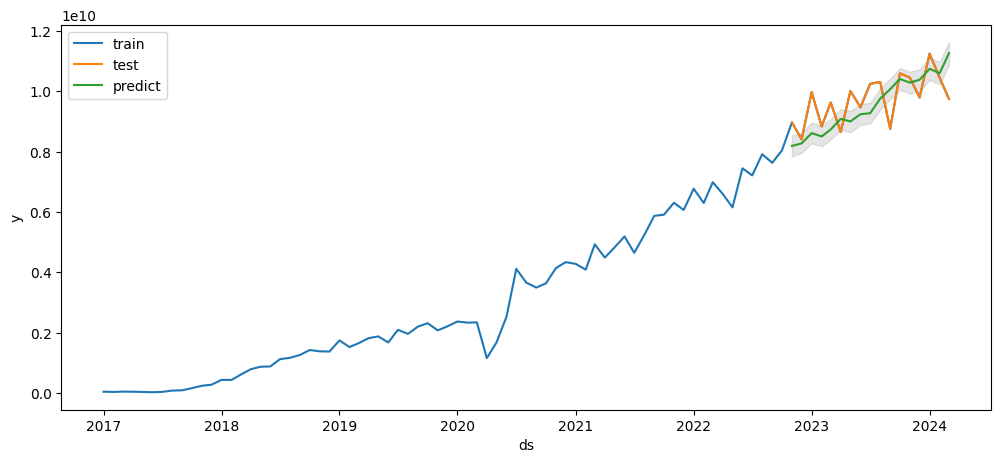

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df3,x=df3.index,y='y',label='train')
sns.lineplot(data=test,x='ds',y='y',label='test')
sns.lineplot(data=test_predict,x='ds',y='yhat',label='predict')
plt.fill_between(test_predict['ds'], test_predict['yhat_lower'], test_predict['yhat_upper'], color='gray', alpha=0.2)
plt.legend()

# Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
np.sqrt(mean_squared_error(y_true=test['y'],
                   y_pred=test_predict['yhat']))

790631461.1951792

In [ ]:
mean_absolute_error(y_true=test['y'],
                   y_pred=test_predict['yhat'])

654448067.8814822

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(y_true=test['y'],
                   y_pred=test_predict['yhat'])

6.777938878829616

# Future forecast

In [ ]:
futureDate = pd.DataFrame(pd.date_range(start='2024-03-01', end='2024-12-01',freq='MS'),columns=['ds'])
futureDate.head(10)

,ds
0,2024-03-01
1,2024-04-01
2,2024-05-01
3,2024-06-01
4,2024-07-01
5,2024-08-01
6,2024-09-01
7,2024-10-01
8,2024-11-01
9,2024-12-01


In [ ]:
# future = m.make_future_dataframe(periods=12,freq='MS')
# future.tail(12)

In [ ]:
forecast = m.predict(futureDate)
forecast[['ds', 'yhat', 'yhat_lower',
		'yhat_upper', 'trend',
		'trend_lower', 'trend_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2024-03-01,1.126163e+10,1.094149e+10,1.159948e+10,1.097559e+10,1.097337e+10,1.097750e+10
1,2024-04-01,1.050566e+10,1.016124e+10,1.082824e+10,1.115759e+10,1.115022e+10,1.116376e+10
2,2024-05-01,1.087472e+10,1.053162e+10,1.122514e+10,1.133372e+10,1.131973e+10,1.134657e+10
3,2024-06-01,1.151946e+10,1.118511e+10,1.185064e+10,1.151572e+10,1.149241e+10,1.153661e+10
4,2024-07-01,1.209732e+10,1.173435e+10,1.242682e+10,1.169185e+10,1.165898e+10,1.172144e+10
5,2024-08-01,1.200126e+10,1.167815e+10,1.234401e+10,1.187385e+10,1.183033e+10,1.191278e+10
6,2024-09-01,1.197768e+10,1.163085e+10,1.234209e+10,1.205585e+10,1.200124e+10,1.210427e+10
7,2024-10-01,1.205487e+10,1.170799e+10,1.240214e+10,1.223198e+10,1.216635e+10,1.229323e+10
8,2024-11-01,1.256117e+10,1.220785e+10,1.292522e+10,1.241398e+10,1.233630e+10,1.248723e+10
9,2024-12-01,1.263717e+10,1.227810e+10,1.298949e+10,1.259011e+10,1.250142e+10,1.267466e+10


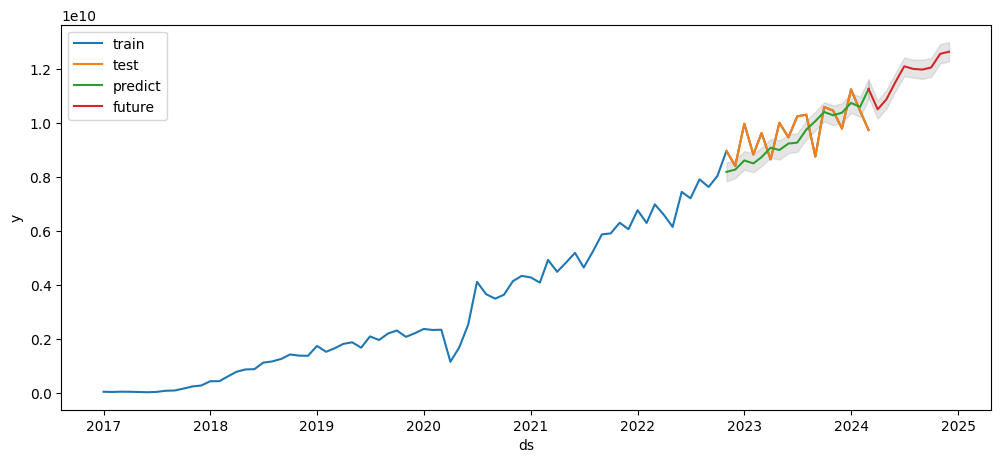

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df3,x=df3.index,y='y',label='train')
sns.lineplot(data=test,x='ds',y='y',label='test')
sns.lineplot(data=test_predict,x='ds',y='yhat',label='predict')
plt.fill_between(test_predict['ds'], test_predict['yhat_lower'], test_predict['yhat_upper'], color='gray', alpha=0.2)
sns.lineplot(data=forecast,x='ds',y='yhat',label='future')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
plt.legend()
plt.show()

# **Hyper-parameter tuning**

In [ ]:
import random

In [ ]:
df3.reset_index(inplace=True)

In [ ]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [50,100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 40


In [ ]:
strt=test['ds'].min()
end=test['ds'].max()
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test1 = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         interval_width=0.95)
    train_model.fit(train)
    train_forecast = train_model.make_future_dataframe(periods=len(test), freq='MS',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test1=train_forecast[['ds','yhat']]
    Actual = df3[(df3['ds']>=strt) & (df3['ds']<=end)]
    MAPE = mean_absolute_percentage_error(y_true=Actual['y'],y_pred=abs(test1['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = pd.concat([model_parameters, pd.DataFrame({'MAPE': [MAPE], 'Parameters': [p]})], ignore_index=True)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/yk4bhki9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/3wnpk6ul.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62229', 'data', 'file=/tmp/tmp6dmlkj6f/yk4bhki9.json', 'init=/tmp/tmp6dmlkj6f/3wnpk6ul.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_model7wi6fxit/prophet_model-20240422121700.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


12:17:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/g7fwlqzk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/pcycfpmt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45935', 'data', 'file=/tmp/tmp6dmlkj6f/g7fwlqzk.json', 'init=/tmp/tmp6dmlkj6f/pcycfpmt.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelrbo4q31o/prophet_model-20240422121701.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 8.358228770674431
{'changepoint_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


12:17:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/dwk343vy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/hxstfxqm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48335', 'data', 'file=/tmp/tmp6dmlkj6f/dwk343vy.json', 'init=/tmp/tmp6dmlkj6f/hxstfxqm.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_model9t0ul32y/prophet_model-20240422121702.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 6.853679400566194
{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:17:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/5ccstqzb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/u46t9q7p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82279', 'data', 'file=/tmp/tmp6dmlkj6f/5ccstqzb.json', 'init=/tmp/tmp6dmlkj6f/u46t9q7p.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelddngwg05/prophet_model-20240422121704.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 8.435991319259454
{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:17:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/b1wbybkm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/2e0_08wy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87886', 'data', 'file=/tmp/tmp6dmlkj6f/b1wbybkm.json', 'init=/tmp/tmp6dmlkj6f/2e0_08wy.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelpxspr63l/prophet_model-20240422121707.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 6.909619946102463
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:17:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/e0fl_pkg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/z717bwlb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24660', 'data', 'file=/tmp/tmp6dmlkj6f/e0fl_pkg.json', 'init=/tmp/tmp6dmlkj6f/z717bwlb.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelahmvzez4/prophet_model-20240422121708.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 8.435991319259454
{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:17:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/trfn4ctq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/92qlhalb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23885', 'data', 'file=/tmp/tmp6dmlkj6f/trfn4ctq.json', 'init=/tmp/tmp6dmlkj6f/92qlhalb.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_model34ldcw1_/prophet_model-20240422121709.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 6.909619946102463
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:17:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/z7ja75_p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/0xna56s6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33332', 'data', 'file=/tmp/tmp6dmlkj6f/z7ja75_p.json', 'init=/tmp/tmp6dmlkj6f/0xna56s6.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_model0qvyjx6g/prophet_model-20240422121711.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 8.435991319259454
{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:17:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/dl09gfjg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/9ojd176s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39263', 'data', 'file=/tmp/tmp6dmlkj6f/dl09gfjg.json', 'init=/tmp/tmp6dmlkj6f/9ojd176s.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelk_0p4kuf/prophet_model-20240422121712.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 6.909619946102463
{'changepoint_prior_scale': 0.2, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


12:17:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/zfcgl67e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/6bo4f5nf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28961', 'data', 'file=/tmp/tmp6dmlkj6f/zfcgl67e.json', 'init=/tmp/tmp6dmlkj6f/6bo4f5nf.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelzunt7pgo/prophet_model-20240422121714.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 8.393307201807053
{'changepoint_prior_scale': 0.2, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


12:17:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/tk7njv9e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/_ro0aeqn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30093', 'data', 'file=/tmp/tmp6dmlkj6f/tk7njv9e.json', 'init=/tmp/tmp6dmlkj6f/_ro0aeqn.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelgrj6xvzv/prophet_model-20240422121715.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 6.841532184781382
{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:17:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/nxkvyr9n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/pma8gvi0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35816', 'data', 'file=/tmp/tmp6dmlkj6f/nxkvyr9n.json', 'init=/tmp/tmp6dmlkj6f/pma8gvi0.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelyct1mtaq/prophet_model-20240422121717.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 8.212938205499313
{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:17:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/ezyi7m32.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/cnuq3xm2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13490', 'data', 'file=/tmp/tmp6dmlkj6f/ezyi7m32.json', 'init=/tmp/tmp6dmlkj6f/cnuq3xm2.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelw9i4y_qs/prophet_model-20240422121720.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 6.777938878829616
{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:17:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/1kfkptrc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/kzdq0xw2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9545', 'data', 'file=/tmp/tmp6dmlkj6f/1kfkptrc.json', 'init=/tmp/tmp6dmlkj6f/kzdq0xw2.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modeljvqsr7dk/prophet_model-20240422121722.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Mean Absolute Percentage Error(MAPE)------------------------------------ 8.212938205499313
{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:17:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/q__3_u46.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/c9is_6tg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89496', 'data', 'file=/tmp/tmp6dmlkj6f/q__3_u46.json', 'init=/tmp/tmp6dmlkj6f/c9is_6tg.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelmxjohr4x/prophet_model-20240422121724.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 6.777938878829616
{'changepoint_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:17:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/7cr17l0y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/62pde0li.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36940', 'data', 'file=/tmp/tmp6dmlkj6f/7cr17l0y.json', 'init=/tmp/tmp6dmlkj6f/62pde0li.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelyaq752a4/prophet_model-20240422121726.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 8.212938205499313
{'changepoint_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:17:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/w3af435y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/wr9m98n5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82250', 'data', 'file=/tmp/tmp6dmlkj6f/w3af435y.json', 'init=/tmp/tmp6dmlkj6f/wr9m98n5.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_model8ah_zca8/prophet_model-20240422121727.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 6.777938878829616
{'changepoint_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


12:17:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/1wvsnh09.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/x3uxhfxy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70781', 'data', 'file=/tmp/tmp6dmlkj6f/1wvsnh09.json', 'init=/tmp/tmp6dmlkj6f/x3uxhfxy.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelc17d24au/prophet_model-20240422121730.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 8.274335901013066
{'changepoint_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


12:17:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/4k_vhplp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/kr6axfo5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7290', 'data', 'file=/tmp/tmp6dmlkj6f/4k_vhplp.json', 'init=/tmp/tmp6dmlkj6f/kr6axfo5.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_model8d_bvbhv/prophet_model-20240422121732.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Mean Absolute Percentage Error(MAPE)------------------------------------ 6.994334366140103
{'changepoint_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:17:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/95qecdxw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/z9gu9sxy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81695', 'data', 'file=/tmp/tmp6dmlkj6f/95qecdxw.json', 'init=/tmp/tmp6dmlkj6f/z9gu9sxy.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_model7nvnpddr/prophet_model-20240422121736.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 8.05396197706385
{'changepoint_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:17:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/h1d8dzp5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/g4mii2ko.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9500', 'data', 'file=/tmp/tmp6dmlkj6f/h1d8dzp5.json', 'init=/tmp/tmp6dmlkj6f/g4mii2ko.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modeligd9z9xb/prophet_model-20240422121738.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Mean Absolute Percentage Error(MAPE)------------------------------------ 7.012614291836786
{'changepoint_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:17:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/z8dxmx4a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/jcsod5ui.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52355', 'data', 'file=/tmp/tmp6dmlkj6f/z8dxmx4a.json', 'init=/tmp/tmp6dmlkj6f/jcsod5ui.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modeli5coqv94/prophet_model-20240422121741.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 8.05396197706385
{'changepoint_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:17:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/1j25ge9h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/ad7l28n6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62596', 'data', 'file=/tmp/tmp6dmlkj6f/1j25ge9h.json', 'init=/tmp/tmp6dmlkj6f/ad7l28n6.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelhm4arf3_/prophet_model-20240422121743.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 7.012614291836786
{'changepoint_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:17:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/8ii21bc8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/xdke5r6y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22071', 'data', 'file=/tmp/tmp6dmlkj6f/8ii21bc8.json', 'init=/tmp/tmp6dmlkj6f/xdke5r6y.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelighv3bdq/prophet_model-20240422121746.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 8.05396197706385
{'changepoint_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:17:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/m66k1pw4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/lxpeukvg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35770', 'data', 'file=/tmp/tmp6dmlkj6f/m66k1pw4.json', 'init=/tmp/tmp6dmlkj6f/lxpeukvg.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelzco72emw/prophet_model-20240422121750.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 7.012614291836786
{'changepoint_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


12:17:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/5g1upm8y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/a1z1b5t9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22829', 'data', 'file=/tmp/tmp6dmlkj6f/5g1upm8y.json', 'init=/tmp/tmp6dmlkj6f/a1z1b5t9.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_model812fygkz/prophet_model-20240422121752.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 8.232795162830001
{'changepoint_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


12:17:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/12c4k80_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/kjuoy3vj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1080', 'data', 'file=/tmp/tmp6dmlkj6f/12c4k80_.json', 'init=/tmp/tmp6dmlkj6f/kjuoy3vj.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modeled_ae2bi/prophet_model-20240422121754.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Mean Absolute Percentage Error(MAPE)------------------------------------ 7.053205488459654
{'changepoint_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:17:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/4m8qsl8c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/wixro0zf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87944', 'data', 'file=/tmp/tmp6dmlkj6f/4m8qsl8c.json', 'init=/tmp/tmp6dmlkj6f/wixro0zf.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelk53ai64q/prophet_model-20240422121756.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 7.8169429951439104
{'changepoint_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:17:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/gy2fhkuq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/t72v2lai.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64349', 'data', 'file=/tmp/tmp6dmlkj6f/gy2fhkuq.json', 'init=/tmp/tmp6dmlkj6f/t72v2lai.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelcjxluafh/prophet_model-20240422121758.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 7.060142315603499
{'changepoint_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:18:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/pldavtyf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/jo_4k2ra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76896', 'data', 'file=/tmp/tmp6dmlkj6f/pldavtyf.json', 'init=/tmp/tmp6dmlkj6f/jo_4k2ra.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelisb01b4v/prophet_model-20240422121800.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:18:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 7.8169429951439104
{'changepoint_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:18:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/b07837_i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/2gkxbkjy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49663', 'data', 'file=/tmp/tmp6dmlkj6f/b07837_i.json', 'init=/tmp/tmp6dmlkj6f/2gkxbkjy.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelkpb5ccih/prophet_model-20240422121803.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:18:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 7.060142315603499
{'changepoint_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:18:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/x7a_3s5m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/mulmlyxo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45387', 'data', 'file=/tmp/tmp6dmlkj6f/x7a_3s5m.json', 'init=/tmp/tmp6dmlkj6f/mulmlyxo.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelmt0t5gne/prophet_model-20240422121805.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:18:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 7.8169429951439104
{'changepoint_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:18:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/mu31ol01.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/40cv7859.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33156', 'data', 'file=/tmp/tmp6dmlkj6f/mu31ol01.json', 'init=/tmp/tmp6dmlkj6f/40cv7859.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelgd4alu1h/prophet_model-20240422121807.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:18:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 7.060142315603499
{'changepoint_prior_scale': 0.5, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


12:18:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/485jkmpi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/bvzpe8v_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20498', 'data', 'file=/tmp/tmp6dmlkj6f/485jkmpi.json', 'init=/tmp/tmp6dmlkj6f/bvzpe8v_.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelc_0nu5r2/prophet_model-20240422121809.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:18:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 7.913149292928587
{'changepoint_prior_scale': 0.5, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


12:18:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/6rwc_s22.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/dizqia4a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7608', 'data', 'file=/tmp/tmp6dmlkj6f/6rwc_s22.json', 'init=/tmp/tmp6dmlkj6f/dizqia4a.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_model8lu1tmhq/prophet_model-20240422121810.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:18:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Mean Absolute Percentage Error(MAPE)------------------------------------ 7.113450037105951
{'changepoint_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


12:18:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/ju2h4003.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/ijjr7ko7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79729', 'data', 'file=/tmp/tmp6dmlkj6f/ju2h4003.json', 'init=/tmp/tmp6dmlkj6f/ijjr7ko7.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modellgj3n8ph/prophet_model-20240422121813.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:18:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 8.160486040631332
{'changepoint_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


12:18:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/uhtk03m3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/d1e071i4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61711', 'data', 'file=/tmp/tmp6dmlkj6f/uhtk03m3.json', 'init=/tmp/tmp6dmlkj6f/d1e071i4.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelpu7yxgk0/prophet_model-20240422121814.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:18:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 7.032474903350675
{'changepoint_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


12:18:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/zis750ps.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/65s259ei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32866', 'data', 'file=/tmp/tmp6dmlkj6f/zis750ps.json', 'init=/tmp/tmp6dmlkj6f/65s259ei.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_model8i5q14b6/prophet_model-20240422121818.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:18:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 8.160486040631332
{'changepoint_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


12:18:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/7jwz5599.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/hp5g4qnc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39309', 'data', 'file=/tmp/tmp6dmlkj6f/7jwz5599.json', 'init=/tmp/tmp6dmlkj6f/hp5g4qnc.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_model80a0mq39/prophet_model-20240422121820.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:18:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 7.032474903350675
{'changepoint_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


12:18:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 55.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/9q74_qyq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6dmlkj6f/ho8ara7g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61566', 'data', 'file=/tmp/tmp6dmlkj6f/9q74_qyq.json', 'init=/tmp/tmp6dmlkj6f/ho8ara7g.json', 'output', 'file=/tmp/tmp6dmlkj6f/prophet_modelub7shw1y/prophet_model-20240422121822.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:18:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Mean Absolute Percentage Error(MAPE)------------------------------------ 8.160486040631332
{'changepoint_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


12:18:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 7.032474903350675


In [ ]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters

,MAPE,Parameters
0,6.777939,"{'changepoint_prior_scale': 0.2, 'n_changepoin..."
1,6.777939,"{'changepoint_prior_scale': 0.2, 'n_changepoin..."
2,6.777939,"{'changepoint_prior_scale': 0.2, 'n_changepoin..."
3,6.841532,"{'changepoint_prior_scale': 0.2, 'n_changepoin..."
4,6.853679,"{'changepoint_prior_scale': 0.1, 'n_changepoin..."
5,6.909620,"{'changepoint_prior_scale': 0.1, 'n_changepoin..."
6,6.909620,"{'changepoint_prior_scale': 0.1, 'n_changepoin..."
7,6.909620,"{'changepoint_prior_scale': 0.1, 'n_changepoin..."
8,6.994334,"{'changepoint_prior_scale': 0.3, 'n_changepoin..."
9,7.012614,"{'changepoint_prior_scale': 0.3, 'n_changepoin..."


This is the best parameter for this dataset:

In [ ]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.2,
 'n_changepoints': 100,
 'seasonality_mode': 'additive'}

Prophet is also doing well.